# Regressão Linear com Gradiente Descendente*
##### * Exercício para a disciplina Aprendizagem de Máquina, PPGCC - UFCG.

Regressão Linear é uma técnica de Aprendizagem de Máquina cujo objetivo é gerar um modelo, a partir de um conjunto de dados, que define um relacionamento entre esses dados. Essa técnica, em geral, usa o método de otimização conhecido como Gradiente Descente, cujo objetivo é encontrar os valores ótimos do modelo, ou seja, um modelo com erro mínimo.

A seguir, descrevemos um algoritmo de Regressão Linear, usando a linguagem Python, baseado na [aula de Siraj Raval](https://www.youtube.com/watch?v=XdM6ER7zTLk).

### 1. Os dados são os anos de escolaridade e o salário de algumas pessoas

Queremos analisar a relação entre a escolaridade de uma pessoa (anos de estudo) e o seu salário. Ou seja, criaremos um algoritmo de regressão linear que nos mostrará qual a função __y = mx + b__, onde __y__ = salário, __x__ = anosDeEstudo e os parâmetros __m__ e __b__ serão encontrados pela regressão.

Iniciando gradiente descendente em b = 0, m = 0, erro = 2946.63449705
Executando...


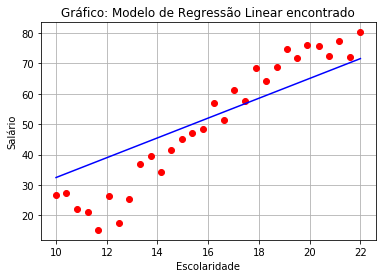

Depois de 1000 iterações b = -0.182342553765, m = 3.2621822676, erro = 103.398422917


In [1]:
# @author Veruska Santos
# @version 0.2

# Código baseado na aula de Siraj Raval
# Dados: anos de escolaridade de uma pessoa e o seu salário

from numpy import * # top para ML, multiplicação de matrizes
import matplotlib.pyplot as plt # gráficos

def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    # calcula o erro para todos os dados
    for i in range(0, len(points)):
        x = points['year'][i]
        y = points['salary'][i]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    
    # gradient descent
    # cálculo das derivadas parciais
    N = float(len(points))
    for i in range(0, len(points)):
        x = points['year'][i]
        y = points['salary'][i]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def plot_graph(points, m, b):
    x = points['year']
    y = points['salary']
    plt.plot(x, y, 'ro', x, m * x + b, 'b-')
    
    plt.grid(True)
    plt.title(u"Gráfico: Modelo de Regressão Linear encontrado")
    plt.xlabel(u"Escolaridade")
    plt.ylabel(u"Salário")
    
    plt.show()

def run():
    points = genfromtxt("income.csv", delimiter=",", names=['year', 'salary'])
    
    learning_rate = 0.0001 # quão rápido deve ser o processo de aprendizagem
    # y = mx + b é o modelo linear que nós queremos
    initial_b = 0 # intercepta o y
    initial_m = 0 # a inclininação da reta
    num_iterations = 1000 # quantidade de repetições do treinamento
    
    print "Iniciando gradiente descendente em b = {0}, m = {1}, erro = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Executando..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    plot_graph(points, m, b)
    print "Depois de {0} iterações b = {1}, m = {2}, erro = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    

if __name__ == '__main__':
    run()

O resultado do algoritmo foi a seguinte relação: __y = 3.26x - 0.18__, com erro = 103.4. Com base nesses dados, a cada ano de escolaridade, o salário da pessoa cresce 3.26 unidades.

O gráfico acima nos mostra a relação encontrada (linha azul) a partir dos dados (pontos vermelhos). A partir do erro alto e do gráfico é possível perceber que o modelo encontrado não mostrou bem a relação, crescente e positiva, entre os dados, porque a inclininação da linha está diferente.

### 2. Imprimindo o RSS a cada iteração do gradiente descendente

No processo de aprendizagem, o objeto aprende gradativamente por passos a partir de algo ou alguém. Assim, na aprendizagem de máquina, o algoritmo deve aprender uma função a partir do dados, consultando-os, por diversas vezes, até que o modelo atinja um erro mínimo - aqui definido como RSS (Residual Sum of Squares). Este processo de consultar os dados e diminuir o erro do modelo é denomidado de iteração. A seguir, veremos o erro do modelo para cada uma das 1000 iterações.

In [2]:

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        
        # 2- Impressão do RSS a cada iteração do gradiente descendente
        print "Iteração {0}, RSS = {1} ".format(i+1, compute_error_for_line_given_points(b, m, points))
    return [b, m]

def run():
    points = genfromtxt("income.csv", delimiter=",", names=['year', 'salary'])
    # quão rápido deve ser o processo de aprendizagem
    learning_rate = 0.0001
    # y = mx + b é o modelo linear que nós queremos
    initial_b = 0 # intercepta o y
    initial_m = 0 # a inclininação da reta
    num_iterations = 1000 # quantidade de repetições do treinamento
    print "Iniciando gradiente descendente em b = {0}, m = {1}, erro = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Executando..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "Depois de {0} iterações b = {1}, m = {2}, erro = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))

if __name__ == '__main__':
    run()

Iniciando gradiente descendente em b = 0, m = 0, erro = 2946.63449705
Executando...
Iteração 1, RSS = 2648.23812663 
Iteração 2, RSS = 2381.17359262 
Iteração 3, RSS = 2142.15101365 
Iteração 4, RSS = 1928.22594993 
Iteração 5, RSS = 1736.76313147 
Iteração 6, RSS = 1565.40399487 
Iteração 7, RSS = 1412.03762879 
Iteração 8, RSS = 1274.7747702 
Iteração 9, RSS = 1151.92453099 
Iteração 10, RSS = 1041.97356839 
Iteração 11, RSS = 943.567442476 
Iteração 12, RSS = 855.493931198 
Iteração 13, RSS = 776.668097302 
Iteração 14, RSS = 706.118923285 
Iteração 15, RSS = 642.977349676 
Iteração 16, RSS = 586.465569318 
Iteração 17, RSS = 535.887445762 
Iteração 18, RSS = 490.619937745 
Iteração 19, RSS = 450.105424102 
Iteração 20, RSS = 413.844834576 
Iteração 21, RSS = 381.391501902 
Iteração 22, RSS = 352.345659429 
Iteração 23, RSS = 326.349516493 
Iteração 24, RSS = 303.082850894 
Iteração 25, RSS = 282.259064154 
Iteração 26, RSS = 263.62165099 
Iteração 27, RSS = 246.941039487 
Iteração 

Iteração 644, RSS = 103.898292551 
Iteração 645, RSS = 103.896883677 
Iteração 646, RSS = 103.895474829 
Iteração 647, RSS = 103.894066009 
Iteração 648, RSS = 103.892657215 
Iteração 649, RSS = 103.891248448 
Iteração 650, RSS = 103.889839708 
Iteração 651, RSS = 103.888430994 
Iteração 652, RSS = 103.887022308 
Iteração 653, RSS = 103.885613648 
Iteração 654, RSS = 103.884205015 
Iteração 655, RSS = 103.882796408 
Iteração 656, RSS = 103.881387829 
Iteração 657, RSS = 103.879979276 
Iteração 658, RSS = 103.87857075 
Iteração 659, RSS = 103.877162251 
Iteração 660, RSS = 103.875753779 
Iteração 661, RSS = 103.874345334 
Iteração 662, RSS = 103.872936915 
Iteração 663, RSS = 103.871528523 
Iteração 664, RSS = 103.870120158 
Iteração 665, RSS = 103.86871182 
Iteração 666, RSS = 103.867303508 
Iteração 667, RSS = 103.865895223 
Iteração 668, RSS = 103.864486965 
Iteração 669, RSS = 103.863078734 
Iteração 670, RSS = 103.86167053 
Iteração 671, RSS = 103.860262352 
Iteração 672, RSS = 103

É possível perceber que, na primeira iteração o erro é enorme e, aparentemente, diminui ao longo das iterações, chegando em 103 na última iteração. Para confirmar esse comportamento, veremos um gráfico com o valor do erro ao longo de todas as iterações do processo.

### 3. Comportamento e gráfico do RSS

Iniciando gradiente descendente em b = 0, m = 0, erro = 2946.63449705
Executando...


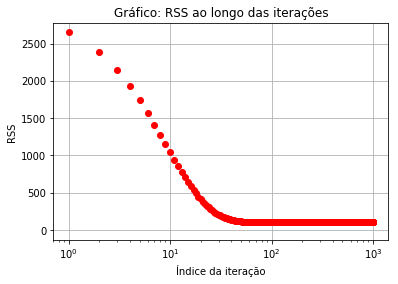

Depois de 1000 iterações b = -0.182342553765, m = 3.2621822676, erro = 103.398422917


In [3]:

def rss_graph(rss_values):

    plt.plot(rss_values, 'ro')

    plt.grid(True)
    plt.title(u"Gráfico: RSS ao longo das iterações")
    plt.xlabel(u"Índice da iteração")
    plt.xscale('log')
    plt.ylabel("RSS")
    
    plt.show()

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    rss_values = []
    rss_values.append(0)
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        rss = compute_error_for_line_given_points(b, m, points)
        rss_values.append(rss)
        
    # 3- Comportamento e gráfico do RSS
    rss_graph(rss_values)
    return [b, m]

if __name__ == '__main__':
    run()

Como visto na seção 2 e no gráfico acima, o RSS diminui ao longo das iterações e estabiliza-se, porque esse é o objetivo do gradiente descente: encontrar o erro mínimo da função. 

### 4. Alterar a quantidade de iterações e a taxa de aprendizagem para encontrar w0 = -39 e w1 = 5  

A quantidade de iterações define quando o algoritmo deve parar de melhorar o modelo, ou seja, parar a execução. A taxa de aprendizagem define a velocidade do aprendizado: se for muito pequeno o algoritmo torna-se lento para encontrar um valor ótimo, e se for muita alta o algoritmo pode perder/passar (d)o valor ótimo. Assim, iremos alterá-los a fim de encontrar os parâmetros m (w0) e b (w1) solicitados.

Iniciando gradiente descendente em b = 0, m = 0, erro = 2946.63449705, iterações = 16000, taxa de aprendizagem = 0.003
Executando...


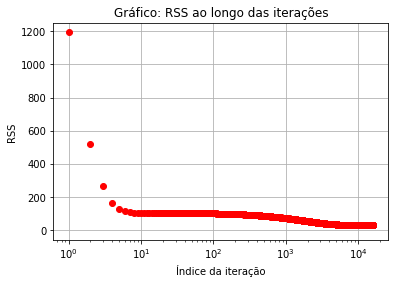

Depois de 16000 iterações b = -39.0339106358, m = 5.57493675643, erro = 29.8369301974


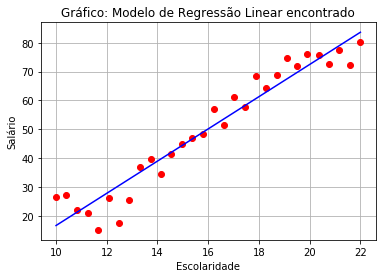

In [4]:

def run():
    points = genfromtxt("income.csv", delimiter=",", names=['year', 'salary'])
    # quão rápido deve ser o processo de aprendizagem
    learning_rate = 0.003
    # y = mx + b é o modelo linear que nós queremos
    initial_b = 0 # intercepta o y
    initial_m = 0 # a inclininação da reta
    num_iterations = 16000 # quantidade de repetições do treinamento
    print "Iniciando gradiente descendente em b = {0}, m = {1}, erro = {2}, iterações = {3}, taxa de aprendizagem = {4}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points), num_iterations, learning_rate)
    print "Executando..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "Depois de {0} iterações b = {1}, m = {2}, erro = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    plot_graph(points, m, b)

if __name__ == '__main__':
    run()

Os parâmetros w0 = -39 e w1 = 5 foram encontradas com __16000 iterações (i)__ e __taxa de aprendizagem (t) 0.003__.

O gráfico acima mostra que, com esses valores de parâmetros, o modelo representa bem a relação existente nos dados e apresenta um erro bem menor (29).

### 5. Alterar critério de parada para o tamanho do gradiente

Como dito anteriormente, o critério de parada do algoritmo era o número de iterações que ele deveria executar. Agora, iremos alterá-lo para ser o tamanho do gradiente, ou seja, o algoritmo só irá parar quando o gradiente for menor do que um valor de tolerância predefinido (= 0.05).

Iniciando gradiente descendente em b = 0, m = 0, erro = 2946.63449705, taxa de aprendizagem = 0.003
Executando...


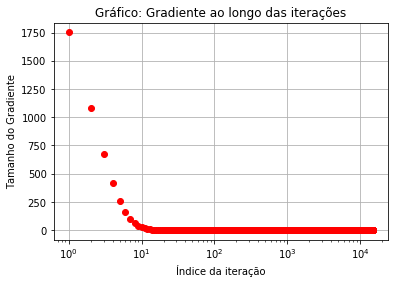

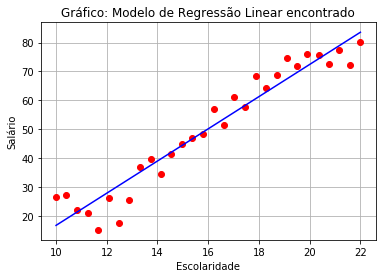

Depois de 15156 iterações b = -38.9216210149, m = 5.56825238466, erro = 29.8419511021


In [5]:

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    
    # gradient descent
    # cálculo das derivadas parciais
    N = float(len(points))
    for i in range(0, len(points)):
        x = points['year'][i]
        y = points['salary'][i]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current)) # o quanto b vai alterar
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current)) # o quanto m vai alterar
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m, b_gradient, m_gradient]

def plot_gradient(values):

    plt.plot(values, 'ro')

    plt.grid(True)
    plt.title(u"Gráfico: Gradiente ao longo das iterações")
    plt.xlabel(u"Índice da iteração")
    plt.xscale('log')
    plt.ylabel("Tamanho do Gradiente")
    
    plt.show()
    
    
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, tolerance):
    b = starting_b
    m = starting_m
    step = 0
    gradient_length = tolerance
    gradient_array = []
    gradient_array.append(0)
    
    # 4- Alteração do critério de parada do algoritmo
    while (gradient_length >= tolerance):
        step += 1
        b, m, b_gradient, m_gradient = step_gradient(b, m, array(points), learning_rate)
        gradient_length = math.sqrt(b_gradient**2 + m_gradient**2)
        gradient_array.append(gradient_length)
        
    plot_gradient(gradient_array)
    return [b, m, step]

def run():
    points = genfromtxt("income.csv", delimiter=",", names=['year', 'salary'])
    # quão rápido deve ser o processo de aprendizagem
    learning_rate = 0.003
    # y = mx + b é o modelo linear que nós queremos
    initial_b = 0 # intercepta o y
    initial_m = 0 # a inclininação da reta
    tolerance = 0.05
    print "Iniciando gradiente descendente em b = {0}, m = {1}, erro = {2}, taxa de aprendizagem = {3}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points), learning_rate)
    print "Executando..."
    [b, m, steps] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, tolerance)
    plot_graph(points, m, b)
    print "Depois de {0} iterações b = {1}, m = {2}, erro = {3}".format(steps, b, m, compute_error_for_line_given_points(b, m, points))

if __name__ == '__main__':
    run()

Alterando o critério de parada, o algoritmo precisou de 15156 iterações para encontrar um modelo aceitável, mostrado no gráfico acima.

No gráfico do gradiente (primeiro logo acima), é possível perceber que ao longo das iterações o tamanho do gradiente diminui.

### 6. Encontrar um valor de tolerância para se aproximar dos parâmetros w0 = -39 e w1 = 5  

Iniciando gradiente descendente em b = 0, m = 0, erro = 2946.63449705, taxa de aprendizagem = 0.003
Executando...


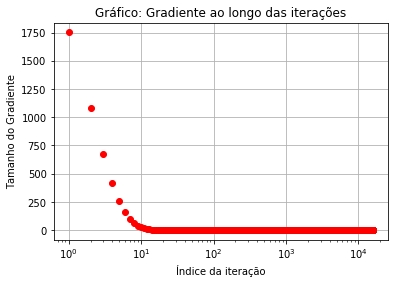

Depois de 15938 iterações b = -39.0265504427, m = 5.57449861917, erro = 29.837222445, tempo de execução = 1.38199996948 s


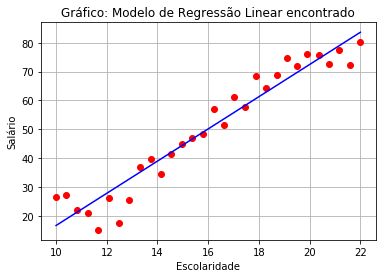

In [6]:
import time

def run():
    points = genfromtxt("income.csv", delimiter=",", names=['year', 'salary'])
    # quão rápido deve ser o processo de aprendizagem
    learning_rate = 0.003
    # y = mx + b é o modelo linear que nós queremos
    initial_b = 0 # intercepta o y
    initial_m = 0 # a inclininação da reta
    tolerance = 0.04
    
    print "Iniciando gradiente descendente em b = {0}, m = {1}, erro = {2}, taxa de aprendizagem = {3}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points), learning_rate)
    print "Executando..."
    
    initial_time = time.time()
    
    [b, m, steps] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, tolerance)
    
    final_time = time.time()
    execution_time = final_time - initial_time
    print "Depois de {0} iterações b = {1}, m = {2}, erro = {3}, tempo de execução = {4} s".format(steps, b, m, compute_error_for_line_given_points(b, m, points), execution_time)
    plot_graph(points, m, b)

if __name__ == '__main__':
    run()

Alterando a tolerância para __0.04__ foi possível chegar aos parâmetros desejados: w0 = -39 e w1 = 5 com um pouco mais de iterações: 15938.

### 7. Implementar a forma fechada (equações normais) de calcular os coeficientes da regressão

Os algoritmos acima usam as técninas de Machine Learning (Aprendizagem de Máquina) para encontrar os coeficientes do modelo que descreve a relação entre a escolaridade de uma pessoa e o seu salário.

Abaixo, será mostrado um algoritmo que calcula esses coeficientes a partir de uma forma fechada e em uma única iteração nos dados.

Executando Regressão Linear Simples...
Depois de 1 iteração m = 5.59948287412, b = -39.4462566791, tempo de execução = 0.0 s


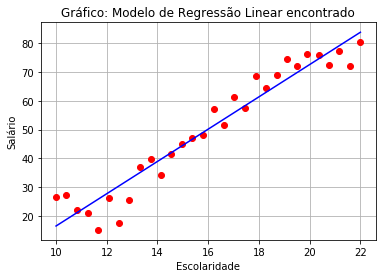

In [7]:

# 7- Cálculo dos coeficientes a partir de equações normais
def linear_regression(points):
    sum_x = 0
    sum_y = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points['year'][i]
        y = points['salary'][i]
        sum_x += x
        sum_y += y
    
    average_x = sum_x/N
    average_y = sum_y/N
    
    a = 0
    b = 0
    for i in range(0, len(points)):
        x = points['year'][i]
        y = points['salary'][i]
        a += ((x - average_x) * (y - average_y))
        b += ((x - average_x)**2)
    
    m = a/b # w1
    b = average_y - m*average_x # w0
    return [m,b]

def run():
    points = genfromtxt("income.csv", delimiter=",", names=['year', 'salary'])
    # y = mx + b é o modelo linear que nós queremos
    print "Executando Regressão Linear Simples..."
    
    initial_time = time.time()
    
    [m, b] = linear_regression(points)
    
    final_time = time.time()
    execution_time = final_time - initial_time
    print "Depois de {0} iteração m = {1}, b = {2}, tempo de execução = {3} s".format(1, m, b, execution_time)
    plot_graph(points, m, b)

if __name__ == '__main__':
    run()

Após a execução do algoritmo, o modelo gerado é da seguinte forma: __y = 5.6x - 39.44__, como mostrado no gráfico acima, representando a relação existente nos dados.

Assim, concluímos que foi possível encontrar um modelo que represente a relação entre os dados, através de forma fechada, e com tempo de execução inferior (menos de 1s) ao algoritmo de Aprendizagem de Máquina com Gradiente Descendente.